In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from math import sqrt
import math
from matplotlib.mlab import PCA
import numpy as np
import numpy.linalg as linalg
from random import sample
import csv
import copy
import os
import glob
fpath = r'/home/moiz/Documents/PRMLlab4/forest/train'
fdpath = r'/home/moiz/Documents/PRMLlab4/forest/dev'

hpath = r'/home/moiz/Documents/PRMLlab4/highway/train'
hdpath = r'/home/moiz/Documents/PRMLlab4/highway/dev'
ipath = r'/home/moiz/Documents/PRMLlab4/insidecity/train'
mpath = r'/home/moiz/Documents/PRMLlab4/mountain/train'
spath = r'/home/moiz/Documents/PRMLlab4/street/train'
sypath = r'/home/moiz/Documents/PRMLlab4/14'
datal = []
ffilenames=glob.glob(fpath+"/*.jpg_color_edh_entropy")
for file in ffilenames:
    data = pd.read_csv(file,index_col=None,header=0,delimiter=' ')
    datal.append(data.values)
comb_np = np.vstack(datal)
fframe = pd.DataFrame(comb_np)

datal = []
ffilenames=glob.glob(fdpath+"/*.jpg_color_edh_entropy")
for file in ffilenames:
    data = pd.read_csv(file,index_col=None,header=0,delimiter=' ')
    datal.append(data.values)
comb_np = np.vstack(datal)
fdframe = pd.DataFrame(comb_np)

datal = []
hfilenames=glob.glob(hpath+"/*.jpg_color_edh_entropy")
for file in hfilenames:
    data = pd.read_csv(file,index_col=None,header=0,delimiter=' ')
    datal.append(data.values)
comb_np = np.vstack(datal)
hframe = pd.DataFrame(comb_np)
#print(hframe.loc[:,1])

datal = []
hfilenames=glob.glob(hdpath+"/*.jpg_color_edh_entropy")
for file in hfilenames:
    data = pd.read_csv(file,index_col=None,header=0,delimiter=' ')
    datal.append(data.values)
comb_np = np.vstack(datal)
hdframe = pd.DataFrame(comb_np)

datal = []
ifilenames=glob.glob(ipath+"/*.jpg_color_edh_entropy")
for file in ifilenames:
    data = pd.read_csv(file,index_col=None,header=0,delimiter=' ')
    datal.append(data.values)
comb_np = np.vstack(datal)
iframe = pd.DataFrame(comb_np)
#print(iframe.loc[:,1])
datal = []
mfilenames=glob.glob(mpath+"/*.jpg_color_edh_entropy")
for file in mfilenames:
    data = pd.read_csv(file,index_col=None,header=0,delimiter=' ')
    datal.append(data.values)
comb_np = np.vstack(datal)
mframe = pd.DataFrame(comb_np)

datal = []
sfilenames=glob.glob(spath+"/*.jpg_color_edh_entropy")
for file in sfilenames:
    data = pd.read_csv(file,index_col=None,header=0,delimiter=' ')
    datal.append(data.values)
comb_np = np.vstack(datal)
sframe = pd.DataFrame(comb_np)


data = np.loadtxt(sypath+"/train.txt",delimiter=",")
labels = np.reshape(data[:,2],(-1,1))

data1=data[np.nonzero(labels[:,0]==1)]
sydata1=pd.DataFrame(data1,index=None)
sydata1=sydata1.loc[:,0:1]

data2=data[np.nonzero(labels[:,0]==2)]
sydata2=pd.DataFrame(data2,index=None)
sydata2=sydata2.loc[:,0:1]

sydata1.reset_index()
sydata2.reset_index()

data = np.loadtxt(sypath+"/dev.txt",delimiter=",")
labels = np.reshape(data[:,2],(-1,1))
data1=data[np.nonzero(labels[:,0]==1)]
syddata1=pd.DataFrame(data1,index=None)
syddata1=syddata1.loc[:,0:1]
data2=data[np.nonzero(labels[:,0]==2)]
syddata2=pd.DataFrame(data2,index=None)
syddata2=syddata2.loc[:,0:1]
syddata1.reset_index()
syddata2.reset_index()
print(fframe.loc[0,:])
#print(fframe.loc[1,:])
print(syddata1.loc[0,:])

0     0.405730
1     0.410250
2     0.183160
3     0.000003
4     0.000299
5     0.000008
6    -0.234780
7    -0.441320
8    -0.061993
9     0.000630
10    0.011011
11    0.005518
12    0.001436
13    0.000479
14    0.009650
15    0.007005
16    0.008718
17    3.277900
18    3.086900
19    2.754600
20    3.444600
21    3.653500
22    3.032400
Name: 0, dtype: float64
0   -9.3298
1    9.6191
Name: 0, dtype: float64


In [2]:
def PCA_numpy(data, n_components=2):
    
    #1nd step is to find covarience matrix
    data_vector = []
    for i in range(data.shape[1]):
        data_vector.append(data.loc[:, i])
    
    cov_matrix = np.cov(data_vector)
    
    #2rd step is to compute eigen vectors and eigne values
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    eig_values = np.reshape(eig_values, (len(cov_matrix), 1))
    
    #Make pairs
    eig_pairs = []
    for i in range(len(eig_values)):
         eig_pairs.append([np.abs(eig_values[i]), eig_vectors[:,i]])
    
    eig_pairs.sort()
    eig_pairs.reverse()
    
    #This PCA is only for 2 components
    reduced_data = np.hstack((eig_pairs[0][1].reshape(len(eig_pairs[0][1]),1), eig_pairs[1][1].reshape(len(eig_pairs[0][1]),1)))
                      
    return data.dot(reduced_data)


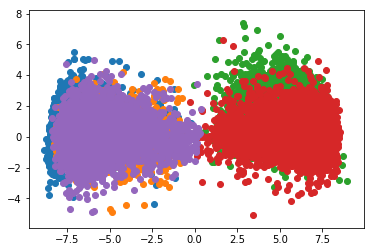

In [3]:
fresult=PCA_numpy(fframe)
hresult=PCA_numpy(hframe)
iresult=PCA_numpy(iframe)
mresult=PCA_numpy(mframe)
sresult=PCA_numpy(sframe)

plt.scatter(fresult.loc[:,0],fresult.loc[:,1])
plt.scatter(hresult.loc[:,0],hresult.loc[:,1])
plt.scatter(iresult.loc[:,0],iresult.loc[:,1])
plt.scatter(mresult.loc[:,0],mresult.loc[:,1])
plt.scatter(sresult.loc[:,0],sresult.loc[:,1])

plt.show()

In [4]:
def initializecentroids(data,k):
    rand_ids = sample(range(data.shape[0]),k)
    centroids = []
    for i in rand_ids:
        d = data.loc[i,:]
        centroids.append(d)
    #print(centroids)
    return centroids



In [5]:
def euclid_dist(x,y):
    n=len(x)
    s=0
    for i in range(n):
        sq = (x[i]-y[i])**2
        s +=sq
    return sqrt(s)


In [6]:
def assigncluster(data,k,centroids):
    acluster=[]
    for i in range(data.shape[0]):
        minind=0
        m=1000000
        for j in range(len(centroids)):
            a = euclid_dist(data.loc[i,:],centroids[j])
            if a <= m:
                m=a
                minind=j
        acluster.append(minind)
    return acluster           


In [7]:
def meaneuclid(datalist):
    d=[]
    for i in range(len(datalist[0])):
        m=0
        for j in range(len(datalist)):
            m += datalist[j][i]
        d.append(m/(len(datalist)))
        
    return d


In [8]:
def estimcentroid(data,k,assclusters):
    centroids = []
    dp=[]
    for i in range(k):
        dp=[]
        for j in range(len(assclusters)):
            if assclusters[j]==i:
                dp.append(data.loc[j,:])
        #print(dp)
        #print(centroids)
        centroids.append(meaneuclid(dp))
    return centroids

In [196]:
def kmeans(data,k):
    centroids = initializecentroids(data,k)
    iter_num=1
    MAX=10
    while iter_num <= MAX:
        assignedclusters = assigncluster(data,k,centroids)
        #print(assignedclusters)
        oldcentroids = copy.deepcopy(centroids)
        centroids = estimcentroid(data,k,assignedclusters)
        iter_num+=1
   # print (assignedclusters)
    return assignedclusters,centroids      

In [195]:
#meaneuclid([[2,3,4],[3,4,5]])
kmeans(fframe,2)
# ac,c=kmeans(sydata2,2)
# x1=[]
# x2=[]
# y2=[]
# y1=[]
# for i in range(sydata2.shape[0]):
#     if ac[i]==1:
#         x1.append(sydata2.loc[i,0])
#         y1.append(sydata2.loc[i,1])
#     else:
#         x2.append(sydata2.loc[i,0])
#         y2.append(sydata2.loc[i,1])
# plt.scatter(x1,y1)
# plt.scatter(x2,y2)
# plt.show()
        

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,


In [198]:
def initializeGMM(data,k,d):
    aclusters,centroids= kmeans(data,k)
    Covmat=[]
    N = data.shape[0]
    Pi=[]
    for i in range(k):
        dp=[]
        n=0
        for j in range(len(aclusters)):
            if aclusters[j]==i:
                n+=1
                dp.append(data.loc[j,:])
        Pi.append(n/N)
        Sig=np.cov(dp,rowvar=False)
        #print(Sig.shape[1])
        if d:
            for l in range(Sig.shape[0]):
                for m in range(Sig.shape[1]):
                    if l!=m:
                        Sig[l][m]=0
        Covmat.append(Sig)
    return centroids,Covmat,Pi
    
       

In [199]:
def gaussianf(x,m,cov):
    d = (-0.5)*x*inv(cov)*np.transpose(x)
    modulo = det(cov)
    K = (1/(2*pi*sqrt(modulo)))*exp(d)
    return K

In [200]:
def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = linalg.det(sigma)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        pi=3.14
        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = np.matrix(x - mu)
        inverse=linalg.inv(sigma)     
        result = math.pow(math.e, -0.5 * (x_mu * inverse * x_mu.T))
        #print(det)
        return norm_const * result

In [201]:
def likelihood(data,Covmat,means,Pi,k):
    p = 0
    for i in range(data.shape[0]):
        sc=0
        for j in range(k):
            #mn=multivariate_normal(mean=means[j],cov=Covmat[j])
            #print(mn.pdf(data.loc[i,:]))
            #a=Normal(data.loc[i,:],means[j],Covmat[j],data.loc[i,:].shape[0])
            #print(Covmat[j])
            b=norm_pdf_multivariate(data.loc[i,:],means[j],Covmat[j])
            sc = sc+Pi[j]*b
        p +=np.log(sc)
    return p

In [202]:
def E(data,means,cov,k,Pi):
    n = data.shape[0]
    Gam =np.zeros([n,k])
    s = np.zeros(n)
    for i in range(n):
        temp = np.zeros(k)
        #print(data.loc[i,:])
        for j in range(k):
            temp[j]=Pi[j] * float(norm_pdf_multivariate(data.loc[i,:],means[j],cov[j]))
            s[i]=s[i]+temp[j]
        for l in range(k):
            Gam[i][l]=temp[l]/s[i]
    return Gam

In [204]:
#mean,Cov,Pi=initializeGMM(sydata1,3)

#print(Cov)
#print(sydata1)
G=E(sydata1,mean,Cov,3,Pi)


In [206]:
def M(data,Gamma,k):
    meannew=[]
    Signew=[]
    Pinew=[]
    n = data.shape[0]
    for i in range(k):
        s =0
        nk=0
        for j in range(n):
            s = s + Gamma[j][i]*data.loc[j,:]
            nk+=Gamma[j][i]
        meannew.append(s/nk)
    d = meannew[0].shape[0];
    for i in range(k):
        s =0
        nk=0
        for j in range(n):
                    dtemp = (data.loc[j,:].values).reshape(d, 1)
                    mtemp = (meannew[i].values).reshape(d, 1)
                    diff_temp = dtemp - mtemp
                    s += Gamma[j][i] * np.dot(diff_temp, diff_temp.T)
                    nk+=Gamma[j][i]
        Signew.append(s/nk)
    for i in range(k):
        s =0
        for j in range(n):
            s = s + Gamma[j][i]
        Pinew.append(s/n)
    return meannew,Signew,Pinew
            

In [135]:
mean,Cov,Pi=initializeGMM(sydata1,3)

#print(Cov[0].shape)
#print(sydata1)
G=E(sydata1,mean,Cov,3,Pi)

mean,Cov,Pi=M(sydata1,G,3)
print(mean)
print(Cov)
print(Pi)
G=E(sydata1,mean,Cov,3,Pi)

[0   -9.397584
1    9.030492
dtype: float64, 0   -6.110496
1    7.669545
dtype: float64, 0    -4.861924
1    12.569851
dtype: float64]
[array([[0.48776797, 0.        ],
       [0.        , 1.43185811]]), array([[2.48175248, 0.        ],
       [0.        , 3.90991215]]), array([[3.4913885 , 0.        ],
       [0.        , 0.94230359]])]
[0.31895454141225316, 0.26219824268926484, 0.41884721589848123]


In [207]:
def GMM(data,k,d):
    iter_g=1
    mean,Cov,Pi=initializeGMM(data,k,d)
    newl=0
    while (iter_g <= 3):
        print(iter_g)
        oldl=newl
        #print(Cov)
        newl=likelihood(data,Cov,mean,Pi,k)
        if( int(oldl) == int(newl)):
            break
        G= E(data,mean,Cov,k,Pi)
        mean,Cov,Pi=M(data,G,k)
        #print(Cov)
        iter_g=iter_g+1
    return mean,Cov,Pi  
            

In [174]:
def plotchinese(ddata,data,k):
    m,c,p=GMM(data,k)
    plt.scatter(ddata.loc[:,0],ddata.loc[:,1])
    for i in range(k):
        xo=m[i][0]
        yo=m[i][1]
        x = np.linspace(xo-2,xo+2,100)
        y = np.linspace(yo-2,yo+2,100)
        z = np.zeros([100,100])
        for j in range(100):
            for k in range(100):
                z[j][k]=norm_pdf_multivariate([x[j],y[k]],m[i],c[i])
        plt.contour(x,y,z)
    return

In [175]:
def classifyvalue(m,c,p,x):
    v=0
    for i in range(len(m)):
        v = v + p[i]*norm_pdf_multivariate(x,m[i],c[i])
    return v

In [208]:
def plotclasschinese(x,y,k,m,c,p):
    plt.scatter(x,y)
    for i in range(k):
        xo=m[i][0]
        yo=m[i][1]
        x = np.linspace(xo-3,xo+3,100)
        y = np.linspace(yo-3,yo+3,100)
        z = np.zeros([100,100])
        for j in range(100):
            for k in range(100):
                z[j][k]=norm_pdf_multivariate([x[j],y[k]],m[i],c[i])
        plt.contour(x,y,z)
    return

In [209]:
def plotclassified(ddata,data,k,n,d):
    mc = []
    cc = []
    pc = []
    cdata = []
    for i in range(n):
        cdata.append([])
    for i in range(n):
        m,c,p = GMM(data[i],k,d)
        mc.append(m)
        cc.append(c)
        pc.append(p)
    ascvals = []
    nc =0
    for i in range(n):
        for j in range(ddata[i].shape[0]):
            ma=0
            maxind=-1
            for l in range(n):
                a = classifyvalue(mc[l],cc[l],pc[l],ddata[i].loc[j,:])
                #print(a)
                if a >= ma:
                    ma=a
                    maxind=l
            if i==maxind:
                nc=nc+1
            cdata[maxind].append(ddata[i].loc[j,:])            
    return mc,cc,pc,cdata,nc

In [212]:
mc,cc,pc,cdata,c=plotclassified([fdframe,hdframe],[fframe,hframe],2,2,False)
mcd,ccd,pcd,cddata,cd=plotclassified([fdframe,hdframe],[fframe,hframe],2,2,True)

#print(c)
#print((cdata[0]))
#print((cdata[1]))

# for i in range(2):
#plotclasschinese(cdata[0],2,mc[0],cc[0],pc[0])
# plt.show()

1
2
3
1
2
3
1
2
3
1
2
3


In [213]:
print(c)
print(cd)

3261
3334


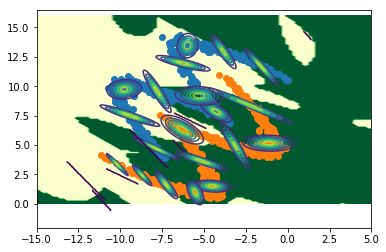

In [183]:
x1=[]
y1=[]
x = np.linspace(-15,5,100)
y = np.linspace(0,16,100)
z = np.zeros([100,100])
for j in range(100):
    for k in range(100):
        c1 = classifyvalue(mcd[0],ccd[0],pcd[0],[x[j],y[k]])
        c2 = classifyvalue(mcd[1],ccd[1],pcd[1],[x[j],y[k]])
        if c1<=c2:
            z[j][k]=0
        else:
            z[j][k]=1
plt.contourf(x,y,z,cmap='YlGn')   
for i in range(len(cdata[0])):
    x1.append(cdata[0][i][0])
    y1.append(cdata[0][i][1])
plotclasschinese(x1,y1,10,mcd[0],ccd[0],pcd[0])
x2=[]
y2=[]
for i in range(len(cdata[1])):
    x2.append(cdata[1][i][0])
    y2.append(cdata[1][i][1])
plotclasschinese(x2,y2,10,mcd[1],ccd[1],pcd[1])
 
#plt.fill(x1,y1)
    
plt.show()

In [193]:
def plotroc(ddata,data,mc,cc,pc):
    tpr=[]
    fpr=[]
    for t in range(10):
        print(t)
        thres = t/10
        tp=0
        fp=0
        tn=0
        fn=0
        n1=0
        n2=0
        for i in range(2):
            for j in range(ddata[i].shape[0]):
                c1 = classifyvalue(mc[0],cc[0],pc[0],ddata[i].loc[j,:])
                c2 = classifyvalue(mc[1],cc[1],pc[1],ddata[i].loc[j,:])
                if (c1/(c1+c2))>=thres:
                        n1=n1+1
                if (c2/(c1+c2))>=thres:
                        n2=n2+1
                if i==0:
                    if (c1/(c1+c2))>=thres:
                        tp=tp+1
                    else:
                        fn=fn+1
        fp = n1 - tp
        tn = 500-fp
        tpr.append((tp/(tp+fn)))
        fpr.append((fp/(fp+tn)))
    plt.plot(fpr,tpr)
    return 
    

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


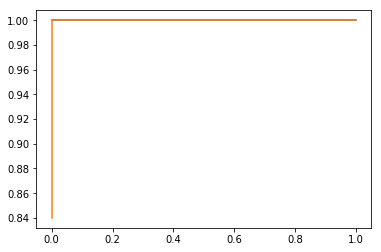

In [194]:
plotroc([syddata1,syddata2],[sydata1,sydata2],mcd,ccd,pcd)
plotroc([syddata1,syddata2],[sydata1,sydata2],mc,cc,pc)
plt.show()